In [39]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [40]:
#read files in
df_100 = pd.read_csv('data/wdms/WDM100.csv',index_col=0)
total_sums = df_100.iloc[:,1:].sum()
wdm_pos = df_100[df_100['LABEL']=='Positive'].iloc[:,1:]
wdm_neg = df_100[df_100['LABEL']=='Negative'].iloc[:,1:]

archer       1
archery      1
arrow       12
bag          0
beginner     0
            ..
weight       1
work         1
worth        1
yard         2
year         1
Length: 100, dtype: int64
happy          1.000000
got            1.000000
inch           1.000000
add            1.000000
long           1.000000
                 ...   
instruction    0.500000
day            0.428571
maybe          0.285714
im             0.250000
better         0.166667
Length: 100, dtype: float64
better    0.833333
im        0.750000
maybe     0.714286
day       0.571429
upper     0.500000
            ...   
got       0.000000
add       0.000000
long      0.000000
ll        0.000000
hole      0.000000
Length: 100, dtype: float64


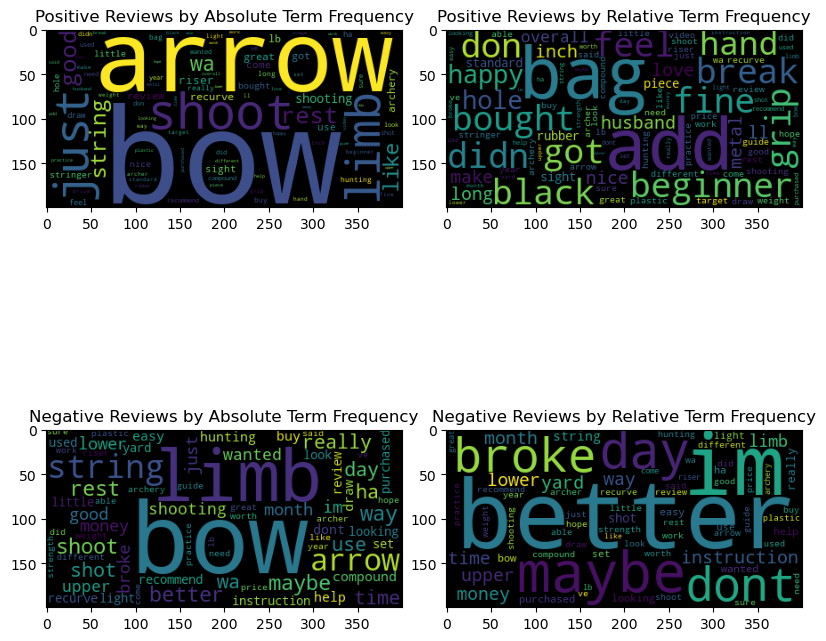

In [41]:
fig, ax = plt.subplots(2,2,constrained_layout=True,figsize=(8,8))
titles=["Positive Reviews by Absolute Term Frequency","Positive Reviews by Relative Term Frequency",
        "Negative Reviews by Absolute Term Frequency","Negative Reviews by Relative Term Frequency"]
print(sums)
for i, wdm in enumerate([wdm_pos,wdm_neg]):
    sums = wdm.sum()
    wordcloud_tot = WordCloud().generate_from_frequencies(sums)
    ax[i,0].imshow(wordcloud_tot)
    ax[i,0].set_title(titles[2*i])
    rel_freq = sums/total_sums
    rel_freq=rel_freq.sort_values(ascending=False)
    print(rel_freq)
    wordcloud_rel = WordCloud().generate_from_frequencies(sums/total_sums)
    ax[i,1].imshow(wordcloud_rel)
    ax[i,1].set_title(titles[2*i+1])

In [52]:
# Compile Basket Data for ARM

df_all = pd.read_csv('data/wdms/WDMAll.csv',index_col=0)
basket_df = pd.DataFrame(columns=['LABEL','transactions'])
for i in range(len(df_all)):
    label=df_all.iloc[i,0]
    terms=df_all.iloc[i,1:].astype(int)
    # For each row, filter that row by x>0, i.e. there is at least one instance of that term in the document.
    filter=terms.apply(lambda x:x>0)
    terms=terms[filter]
    # Then turn the index of the resulting series into a comma separated list to get the basket of terms.
    basket = ' '.join(list(terms.index))
    basket_df.loc[len(basket_df.index)]=[label,basket]
basket_df.to_csv('data/basket_df_all.csv')
basket_df[basket_df['LABEL']=='Positive']['transactions'].to_csv('data/basket_pos.csv',index=False)
basket_df[basket_df['LABEL']=='Negative']['transactions'].to_csv('data/basket_neg.csv',index=False)